O objetivo deste código é realizar as previsões e comparações entre modelos.

Fonte relevante: https://www.sktime.net/en/latest/examples/01_forecasting.html

Seção importante: "A common use case requires the forecaster to regularly update with new data and make forecasts on a rolling basis. This is especially useful if the same kind of forecast has to be made at regular time points, e.g., daily or weekly. sktime forecasters support this type of deployment workflow via the update and update_predict methods."

Em: https://www.sktime.net/en/latest/examples/01_forecasting.html#1.3.2-The-basic-batch-forecast-evaluation-workflow-in-a-nutshell---metric-class-interface

In [1]:
from sktime.forecasting.arima import AutoARIMA
from sktime.split import temporal_train_test_split, ExpandingWindowSplitter
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as mape
from sktime.performance_metrics.forecasting import mean_absolute_error as mae
import pandas as pd
import utils

In [2]:
y = pd.read_csv("dados/dados_arima.csv", sep=";", decimal=",")
y = utils.index_to_period(y)
# Divide série em 2/3 para treino e 1/3 para teste
y_train, y_test = temporal_train_test_split(y, test_size=79)
y

,var
month,
2004-01,0.76
2004-02,0.61
2004-03,0.47
2004-04,0.37
2004-05,0.51
...,...
2023-05,0.23
2023-06,-0.08
2023-07,0.12


In [4]:
# Treina modelo e realiza previsões
# Horizonte de previsão: um passo à frente (h = 1)
fh = ForecastingHorizon(1, is_relative=True)
cv = ExpandingWindowSplitter(fh=fh, initial_window=y_train.size)
forecaster = AutoARIMA(sp=12) # sp=12 pois a série é mensal
forecaster.fit(y_train)
y_pred = forecaster.update_predict(y, cv=cv)

C:\Users\asfra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asfra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asfra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asfra\AppData\Local\Packages

In [5]:
# Carrega previsões salvas
# Não misturar com previsões do modelo no bloco acima
y_pred = pd.read_csv("previsões/arima.csv", sep=";", decimal=",")
y_pred = y_pred.rename(columns={y_pred.columns[0]: "month", y_pred.columns[1]: "ipca"})
y_pred = utils.index_to_period(y_pred)
y_pred.tail(5)

,ipca
month,
2023-05,0.519244
2023-06,0.320841
2023-07,-0.002215
2023-08,0.248564
2023-09,0.299311


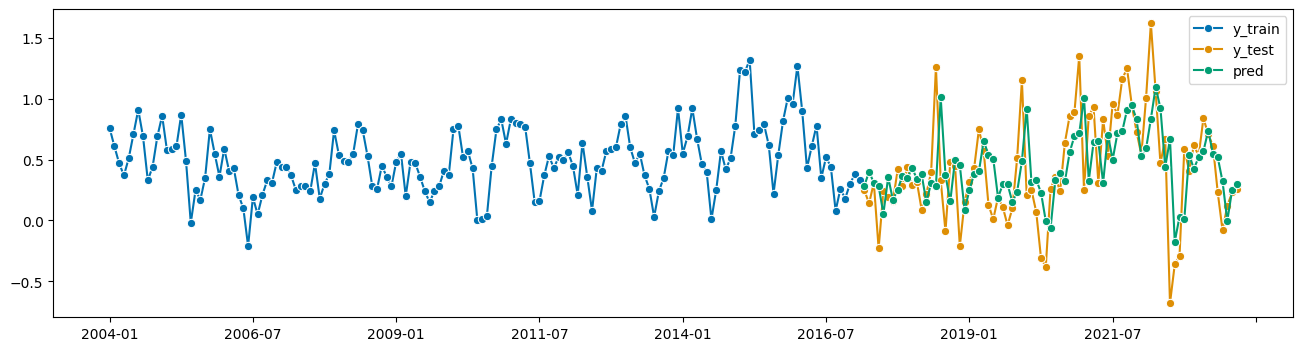

In [9]:
fig, ax = plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'pred'])

In [14]:
fig.savefig("arima_pred.png")

In [10]:
forecaster.get_fitted_params()

{'intercept': 0.18020705236003967,
 'ar.L1': 0.6302824734799789,
 'ma.S.L12': 0.26778663675848924,
 'sigma2': 0.037347466580843036,
 'order': (1, 0, 0),
 'seasonal_order': (0, 0, 1, 12),
 'aic': -61.629373864985325,
 'aicc': -61.367935956488594,
 'bic': -49.37899373287746,
 'hqic': -56.65434023128604}

In [16]:
mape(y_test, y_pred['var'])

1.5908361219715654

In [17]:
mae(y_test, y_pred['var'])

0.2817307930756514

In [18]:
y_pred.to_csv("previsões/arima.csv", sep=";", decimal=",")

A partir daqui, testo outros modelos ARIMA

In [9]:
fig.savefig("arima_test.png")

In [11]:
mape(y_test, y_pred)

1.5908361219715654

In [11]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  158
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                  34.815
Date:                              Sun, 10 Dec 2023   AIC                            -61.629
Time:                                      10:30:36   BIC                            -49.379
Sample:                                  01-31-2004   HQIC                           -56.654
                                       - 02-28-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1802      0.042      4.283      0.000       0.098       0.263
ar.L1          0.6303      0.069      9.175      0.000       0.496       0.765
ma.S.L12       0.2678      0.077      3.491      0.000       0.117       0.418
sigma2         0.0373      0.004      8.656      0.000       0.029       0.046
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.52   Prob(JB):                         0.96
Heteroskedasticity (H):               1.42   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""